In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score

In [2]:
dataset=pd.read_csv('bank.csv')

In [3]:
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
dataset.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
dataset.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [7]:
dataset.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
deposit      False
dtype: bool

In [8]:
dataset.shape

(11162, 17)

In [9]:
print(dataset.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


In [10]:
dataset["deposit"] = dataset.deposit.apply(lambda  x:1 if x=="yes" else 0)
dataset["loan"] = dataset.loan.apply(lambda  x:1 if x=="yes" else 0)
dataset["housing"] = dataset.housing.apply(lambda  x:1 if x=="yes" else 0)
dataset["default"] = dataset.default.apply(lambda  x:1 if x=="yes" else 0)

In [11]:
print(dataset.dtypes)

age           int64
job          object
marital      object
education    object
default       int64
balance       int64
housing       int64
loan          int64
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit       int64
dtype: object


# Pie Chart Distribution

In [13]:
dataset2=dataset[['deposit','loan','housing','default']]

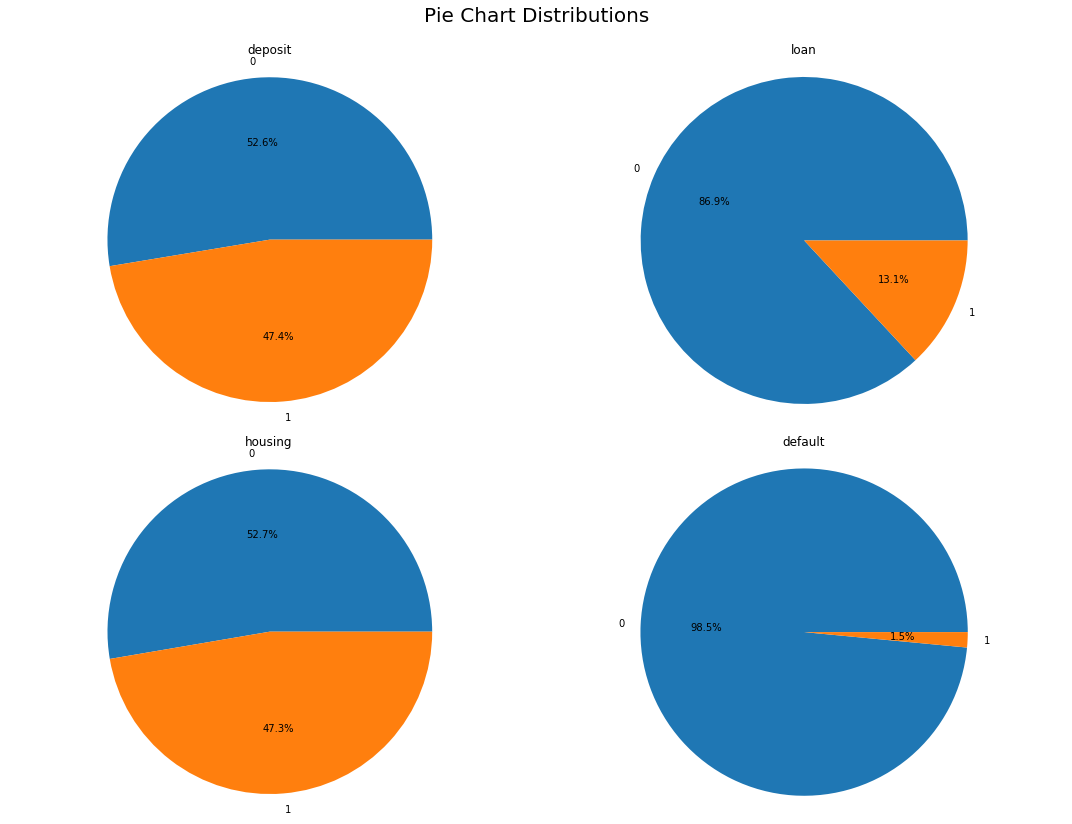

In [14]:
fig=plt.figure(figsize=(15,12))
plt.suptitle('Pie Chart Distributions',fontsize=20)
for i in range (1,dataset2.shape[1]+1):
    plt.subplot(2,2,i)
    f=plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset2.columns.values[i-1])
    values=dataset2.iloc[:,i-1].value_counts(normalize=True).values
    index=dataset2.iloc[:,i-1].value_counts(normalize=True).index
    
    plt.pie(values,labels=index,autopct='%1.1f%%')
    plt.axis('equal')
plt.tight_layout(rect=[0,0.03,1,0.95])

In [16]:
dataset[dataset2.default==1].deposit.value_counts()

0    116
1     52
Name: deposit, dtype: int64

In [20]:
X = dataset.drop(['deposit'],axis=1)

In [21]:
y=dataset['deposit']

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20, random_state=0)

In [25]:
# convert categorical columns to integers
category_cols = ['job','marital','education','contact','month','poutcome']
for header in category_cols:
    X_train[header] = X_train[header].astype('category').cat.codes
    X_test[header] = X_test[header].astype('category').cat.codes

C:\Users\sid321axn\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\sid321axn\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [26]:
print(X_train.dtypes)

age          int64
job           int8
marital       int8
education     int8
default      int64
balance      int64
housing      int64
loan         int64
contact       int8
day          int64
month         int8
duration     int64
campaign     int64
pdays        int64
previous     int64
poutcome      int8
dtype: object


In [28]:
categorical_features_indices = np.where(X.dtypes != np.int64)[0]

In [29]:
model = CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42)

In [30]:
model.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test))


0:	learn: 0.8066973	test: 0.8163905	best: 0.8163905 (0)	total: 374ms	remaining: 6m 13s
1:	learn: 0.8186807	test: 0.8168383	best: 0.8168383 (1)	total: 474ms	remaining: 3m 56s
2:	learn: 0.8192407	test: 0.8172862	best: 0.8172862 (2)	total: 574ms	remaining: 3m 10s
3:	learn: 0.8131930	test: 0.8101209	best: 0.8172862 (2)	total: 677ms	remaining: 2m 48s
4:	learn: 0.8165528	test: 0.8159427	best: 0.8172862 (2)	total: 764ms	remaining: 2m 31s
5:	learn: 0.8202486	test: 0.8186296	best: 0.8186296 (5)	total: 864ms	remaining: 2m 23s
6:	learn: 0.8189047	test: 0.8186296	best: 0.8186296 (5)	total: 950ms	remaining: 2m 14s
7:	learn: 0.8229365	test: 0.8244514	best: 0.8244514 (7)	total: 1.05s	remaining: 2m 9s
8:	learn: 0.8233845	test: 0.8199731	best: 0.8244514 (7)	total: 1.15s	remaining: 2m 6s
9:	learn: 0.8251764	test: 0.8226601	best: 0.8244514 (7)	total: 1.24s	remaining: 2m 2s
10:	learn: 0.8278643	test: 0.8257949	best: 0.8257949 (10)	total: 1.33s	remaining: 1m 59s
11:	learn: 0.8303281	test: 0.8266906	best: 0

93:	learn: 0.8569829	test: 0.8490820	best: 0.8504254 (57)	total: 8.23s	remaining: 1m 19s
94:	learn: 0.8572069	test: 0.8490820	best: 0.8504254 (57)	total: 8.29s	remaining: 1m 19s
95:	learn: 0.8582148	test: 0.8495298	best: 0.8504254 (57)	total: 8.38s	remaining: 1m 18s
96:	learn: 0.8582148	test: 0.8495298	best: 0.8504254 (57)	total: 8.41s	remaining: 1m 18s
97:	learn: 0.8582148	test: 0.8495298	best: 0.8504254 (57)	total: 8.47s	remaining: 1m 17s
98:	learn: 0.8593348	test: 0.8495298	best: 0.8504254 (57)	total: 8.55s	remaining: 1m 17s
99:	learn: 0.8591108	test: 0.8499776	best: 0.8504254 (57)	total: 8.64s	remaining: 1m 17s
100:	learn: 0.8596707	test: 0.8495298	best: 0.8504254 (57)	total: 8.74s	remaining: 1m 17s
101:	learn: 0.8597827	test: 0.8495298	best: 0.8504254 (57)	total: 8.8s	remaining: 1m 17s
102:	learn: 0.8604547	test: 0.8495298	best: 0.8504254 (57)	total: 8.89s	remaining: 1m 17s
103:	learn: 0.8610147	test: 0.8495298	best: 0.8504254 (57)	total: 9s	remaining: 1m 17s
104:	learn: 0.8610147

184:	learn: 0.8712062	test: 0.8540081	best: 0.8557994 (177)	total: 17s	remaining: 1m 14s
185:	learn: 0.8716542	test: 0.8540081	best: 0.8557994 (177)	total: 17s	remaining: 1m 14s
186:	learn: 0.8714302	test: 0.8535602	best: 0.8557994 (177)	total: 17.1s	remaining: 1m 14s
187:	learn: 0.8716542	test: 0.8535602	best: 0.8557994 (177)	total: 17.2s	remaining: 1m 14s
188:	learn: 0.8714302	test: 0.8535602	best: 0.8557994 (177)	total: 17.3s	remaining: 1m 14s
189:	learn: 0.8721021	test: 0.8535602	best: 0.8557994 (177)	total: 17.4s	remaining: 1m 14s
190:	learn: 0.8719901	test: 0.8544559	best: 0.8557994 (177)	total: 17.5s	remaining: 1m 14s
191:	learn: 0.8715422	test: 0.8540081	best: 0.8557994 (177)	total: 17.6s	remaining: 1m 14s
192:	learn: 0.8714302	test: 0.8531124	best: 0.8557994 (177)	total: 17.7s	remaining: 1m 14s
193:	learn: 0.8713182	test: 0.8531124	best: 0.8557994 (177)	total: 17.8s	remaining: 1m 14s
194:	learn: 0.8719901	test: 0.8540081	best: 0.8557994 (177)	total: 17.9s	remaining: 1m 14s
195

276:	learn: 0.8800538	test: 0.8580385	best: 0.8580385 (260)	total: 25.9s	remaining: 1m 7s
277:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26s	remaining: 1m 7s
278:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.1s	remaining: 1m 7s
279:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.2s	remaining: 1m 7s
280:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.3s	remaining: 1m 7s
281:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.3s	remaining: 1m 7s
282:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.4s	remaining: 1m 6s
283:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.5s	remaining: 1m 6s
284:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.6s	remaining: 1m 6s
285:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.7s	remaining: 1m 6s
286:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.8s	remaining: 1m 6s
287:	learn: 

370:	learn: 0.8846455	test: 0.8584863	best: 0.8602777 (335)	total: 34.6s	remaining: 58.7s
371:	learn: 0.8848695	test: 0.8589342	best: 0.8602777 (335)	total: 34.7s	remaining: 58.6s
372:	learn: 0.8847575	test: 0.8589342	best: 0.8602777 (335)	total: 34.8s	remaining: 58.5s
373:	learn: 0.8847575	test: 0.8589342	best: 0.8602777 (335)	total: 34.9s	remaining: 58.4s
374:	learn: 0.8847575	test: 0.8589342	best: 0.8602777 (335)	total: 35s	remaining: 58.3s
375:	learn: 0.8848695	test: 0.8589342	best: 0.8602777 (335)	total: 35.1s	remaining: 58.2s
376:	learn: 0.8853175	test: 0.8589342	best: 0.8602777 (335)	total: 35.1s	remaining: 58.1s
377:	learn: 0.8853175	test: 0.8589342	best: 0.8602777 (335)	total: 35.2s	remaining: 58s
378:	learn: 0.8855415	test: 0.8589342	best: 0.8602777 (335)	total: 35.3s	remaining: 57.9s
379:	learn: 0.8854295	test: 0.8589342	best: 0.8602777 (335)	total: 35.4s	remaining: 57.8s
380:	learn: 0.8855415	test: 0.8589342	best: 0.8602777 (335)	total: 35.5s	remaining: 57.7s
381:	learn: 0.

463:	learn: 0.8897973	test: 0.8571429	best: 0.8602777 (335)	total: 42.6s	remaining: 49.2s
464:	learn: 0.8899093	test: 0.8571429	best: 0.8602777 (335)	total: 42.7s	remaining: 49.1s
465:	learn: 0.8896853	test: 0.8566950	best: 0.8602777 (335)	total: 42.8s	remaining: 49s
466:	learn: 0.8895733	test: 0.8571429	best: 0.8602777 (335)	total: 42.9s	remaining: 48.9s
467:	learn: 0.8896853	test: 0.8571429	best: 0.8602777 (335)	total: 42.9s	remaining: 48.8s
468:	learn: 0.8896853	test: 0.8571429	best: 0.8602777 (335)	total: 43s	remaining: 48.7s
469:	learn: 0.8895733	test: 0.8566950	best: 0.8602777 (335)	total: 43.1s	remaining: 48.6s
470:	learn: 0.8895733	test: 0.8566950	best: 0.8602777 (335)	total: 43.2s	remaining: 48.5s
471:	learn: 0.8895733	test: 0.8566950	best: 0.8602777 (335)	total: 43.3s	remaining: 48.4s
472:	learn: 0.8894613	test: 0.8566950	best: 0.8602777 (335)	total: 43.4s	remaining: 48.3s
473:	learn: 0.8899093	test: 0.8562472	best: 0.8602777 (335)	total: 43.5s	remaining: 48.3s
474:	learn: 0.

556:	learn: 0.8940531	test: 0.8580385	best: 0.8602777 (335)	total: 50.8s	remaining: 40.4s
557:	learn: 0.8940531	test: 0.8580385	best: 0.8602777 (335)	total: 50.9s	remaining: 40.3s
558:	learn: 0.8940531	test: 0.8571429	best: 0.8602777 (335)	total: 51s	remaining: 40.2s
559:	learn: 0.8940531	test: 0.8580385	best: 0.8602777 (335)	total: 51s	remaining: 40.1s
560:	learn: 0.8942771	test: 0.8575907	best: 0.8602777 (335)	total: 51.1s	remaining: 40s
561:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 51.2s	remaining: 39.9s
562:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 51.3s	remaining: 39.8s
563:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 51.4s	remaining: 39.7s
564:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 51.5s	remaining: 39.6s
565:	learn: 0.8943891	test: 0.8575907	best: 0.8602777 (335)	total: 51.6s	remaining: 39.6s
566:	learn: 0.8945011	test: 0.8571429	best: 0.8602777 (335)	total: 51.7s	remaining: 39.5s
567:	learn: 0.89

650:	learn: 0.8967410	test: 0.8602777	best: 0.8607255 (647)	total: 59.7s	remaining: 32s
651:	learn: 0.8965170	test: 0.8602777	best: 0.8607255 (647)	total: 59.8s	remaining: 31.9s
652:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 59.8s	remaining: 31.8s
653:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 59.9s	remaining: 31.7s
654:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 1m	remaining: 31.6s
655:	learn: 0.8965170	test: 0.8598298	best: 0.8607255 (647)	total: 1m	remaining: 31.5s
656:	learn: 0.8965170	test: 0.8593820	best: 0.8607255 (647)	total: 1m	remaining: 31.4s
657:	learn: 0.8969649	test: 0.8593820	best: 0.8607255 (647)	total: 1m	remaining: 31.3s
658:	learn: 0.8969649	test: 0.8593820	best: 0.8607255 (647)	total: 1m	remaining: 31.2s
659:	learn: 0.8969649	test: 0.8593820	best: 0.8607255 (647)	total: 1m	remaining: 31.1s
660:	learn: 0.8968530	test: 0.8593820	best: 0.8607255 (647)	total: 1m	remaining: 31.1s
661:	learn: 0.8971889	test: 0.858

743:	learn: 0.9005488	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.8s
744:	learn: 0.9007728	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.7s
745:	learn: 0.9009968	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.6s
746:	learn: 0.9009968	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.5s
747:	learn: 0.9012207	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.4s
748:	learn: 0.9012207	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.3s
749:	learn: 0.9012207	test: 0.8593820	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.3s
750:	learn: 0.9012207	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.2s
751:	learn: 0.9012207	test: 0.8589342	best: 0.8607255 (647)	total: 1m 10s	remaining: 23.1s
752:	learn: 0.9012207	test: 0.8589342	best: 0.8607255 (647)	total: 1m 10s	remaining: 23s
753:	learn: 0.9012207	test: 0.8589342	best: 0.8607255 (647)	total: 1m 10s	remaining: 22.9s
754:	lear

834:	learn: 0.9035726	test: 0.8593820	best: 0.8607255 (647)	total: 1m 18s	remaining: 15.5s
835:	learn: 0.9036846	test: 0.8598298	best: 0.8607255 (647)	total: 1m 18s	remaining: 15.4s
836:	learn: 0.9035726	test: 0.8598298	best: 0.8607255 (647)	total: 1m 18s	remaining: 15.3s
837:	learn: 0.9036846	test: 0.8598298	best: 0.8607255 (647)	total: 1m 18s	remaining: 15.2s
838:	learn: 0.9037966	test: 0.8593820	best: 0.8607255 (647)	total: 1m 18s	remaining: 15.1s
839:	learn: 0.9033486	test: 0.8607255	best: 0.8607255 (647)	total: 1m 19s	remaining: 15s
840:	learn: 0.9037966	test: 0.8602777	best: 0.8607255 (647)	total: 1m 19s	remaining: 15s
841:	learn: 0.9037966	test: 0.8598298	best: 0.8607255 (647)	total: 1m 19s	remaining: 14.9s
842:	learn: 0.9037966	test: 0.8598298	best: 0.8607255 (647)	total: 1m 19s	remaining: 14.8s
843:	learn: 0.9037966	test: 0.8598298	best: 0.8607255 (647)	total: 1m 19s	remaining: 14.7s
844:	learn: 0.9037966	test: 0.8598298	best: 0.8607255 (647)	total: 1m 19s	remaining: 14.6s
845

927:	learn: 0.9060365	test: 0.8593820	best: 0.8611733 (858)	total: 1m 27s	remaining: 6.79s
928:	learn: 0.9060365	test: 0.8598298	best: 0.8611733 (858)	total: 1m 27s	remaining: 6.7s
929:	learn: 0.9062605	test: 0.8593820	best: 0.8611733 (858)	total: 1m 27s	remaining: 6.6s
930:	learn: 0.9062605	test: 0.8593820	best: 0.8611733 (858)	total: 1m 27s	remaining: 6.51s
931:	learn: 0.9062605	test: 0.8593820	best: 0.8611733 (858)	total: 1m 27s	remaining: 6.41s
932:	learn: 0.9062605	test: 0.8598298	best: 0.8611733 (858)	total: 1m 28s	remaining: 6.32s
933:	learn: 0.9063725	test: 0.8598298	best: 0.8611733 (858)	total: 1m 28s	remaining: 6.22s
934:	learn: 0.9062605	test: 0.8598298	best: 0.8611733 (858)	total: 1m 28s	remaining: 6.13s
935:	learn: 0.9062605	test: 0.8598298	best: 0.8611733 (858)	total: 1m 28s	remaining: 6.04s
936:	learn: 0.9063725	test: 0.8598298	best: 0.8611733 (858)	total: 1m 28s	remaining: 5.94s
937:	learn: 0.9063725	test: 0.8598298	best: 0.8611733 (858)	total: 1m 28s	remaining: 5.85s
9

In [31]:
y_predict = model.predict(X_test)
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, y_predict)
acc = accuracy_score(y_test, y_predict)
prec = precision_score(y_test, y_predict)
rec = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)

results = pd.DataFrame([['CatBoost', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,CatBoost,0.861621,0.832889,0.885633,0.858452,0.862817


In [42]:
cv_data = cv(Pool(X,y,cat_features=categorical_features_indices),model.get_params(),fold_count=10)

0:	learn: 0.7838999	test: 0.7804140	best: 0.7804140 (0)	total: 887ms	remaining: 14m 46s
1:	learn: 0.7967909	test: 0.7936715	best: 0.7936715 (1)	total: 1.93s	remaining: 16m 4s
2:	learn: 0.8057599	test: 0.8015540	best: 0.8015540 (2)	total: 2.92s	remaining: 16m 10s
3:	learn: 0.8111850	test: 0.8060341	best: 0.8060341 (3)	total: 3.84s	remaining: 15m 55s
4:	learn: 0.8169585	test: 0.8118578	best: 0.8118578 (4)	total: 4.77s	remaining: 15m 49s
5:	learn: 0.8198949	test: 0.8163374	best: 0.8163374 (5)	total: 5.68s	remaining: 15m 41s
6:	learn: 0.8217166	test: 0.8183981	best: 0.8183981 (6)	total: 6.65s	remaining: 15m 43s
7:	learn: 0.8235980	test: 0.8201003	best: 0.8201003 (7)	total: 7.72s	remaining: 15m 57s
8:	learn: 0.8258377	test: 0.8225194	best: 0.8225194 (8)	total: 8.66s	remaining: 15m 54s
9:	learn: 0.8277788	test: 0.8235946	best: 0.8235946 (9)	total: 9.57s	remaining: 15m 47s
10:	learn: 0.8313126	test: 0.8269104	best: 0.8269104 (10)	total: 10.5s	remaining: 15m 44s
11:	learn: 0.8335324	test: 0.82

92:	learn: 0.8615640	test: 0.8542358	best: 0.8542358 (92)	total: 1m 17s	remaining: 12m 39s
93:	learn: 0.8617929	test: 0.8542358	best: 0.8542358 (92)	total: 1m 18s	remaining: 12m 37s
94:	learn: 0.8619423	test: 0.8543254	best: 0.8543254 (94)	total: 1m 19s	remaining: 12m 35s
95:	learn: 0.8620119	test: 0.8545944	best: 0.8545944 (95)	total: 1m 20s	remaining: 12m 34s
96:	learn: 0.8620816	test: 0.8548633	best: 0.8548633 (96)	total: 1m 20s	remaining: 12m 32s
97:	learn: 0.8622708	test: 0.8543257	best: 0.8548633 (96)	total: 1m 21s	remaining: 12m 31s
98:	learn: 0.8625395	test: 0.8548631	best: 0.8548633 (96)	total: 1m 22s	remaining: 12m 30s
99:	learn: 0.8627983	test: 0.8550423	best: 0.8550423 (99)	total: 1m 23s	remaining: 12m 29s
100:	learn: 0.8629178	test: 0.8549528	best: 0.8550423 (99)	total: 1m 24s	remaining: 12m 28s
101:	learn: 0.8631069	test: 0.8548631	best: 0.8550423 (99)	total: 1m 24s	remaining: 12m 27s
102:	learn: 0.8632761	test: 0.8551319	best: 0.8551319 (102)	total: 1m 25s	remaining: 12m

181:	learn: 0.8742957	test: 0.8590742	best: 0.8591638 (175)	total: 2m 37s	remaining: 11m 47s
182:	learn: 0.8743753	test: 0.8592534	best: 0.8592534 (182)	total: 2m 38s	remaining: 11m 46s
183:	learn: 0.8743753	test: 0.8591639	best: 0.8592534 (182)	total: 2m 39s	remaining: 11m 46s
184:	learn: 0.8745147	test: 0.8588950	best: 0.8592534 (182)	total: 2m 40s	remaining: 11m 45s
185:	learn: 0.8746142	test: 0.8591640	best: 0.8592534 (182)	total: 2m 41s	remaining: 11m 44s
186:	learn: 0.8746939	test: 0.8592535	best: 0.8592535 (186)	total: 2m 42s	remaining: 11m 44s
187:	learn: 0.8747138	test: 0.8592536	best: 0.8592536 (187)	total: 2m 42s	remaining: 11m 43s
188:	learn: 0.8749228	test: 0.8597911	best: 0.8597911 (188)	total: 2m 43s	remaining: 11m 43s
189:	learn: 0.8750323	test: 0.8598807	best: 0.8598807 (189)	total: 2m 44s	remaining: 11m 42s
190:	learn: 0.8750721	test: 0.8601495	best: 0.8601495 (190)	total: 2m 45s	remaining: 11m 42s
191:	learn: 0.8750821	test: 0.8592535	best: 0.8601495 (190)	total: 2m 

270:	learn: 0.8806665	test: 0.8619415	best: 0.8619415 (270)	total: 3m 59s	remaining: 10m 44s
271:	learn: 0.8806765	test: 0.8617624	best: 0.8619415 (270)	total: 4m	remaining: 10m 43s
272:	learn: 0.8807462	test: 0.8617623	best: 0.8619415 (270)	total: 4m 1s	remaining: 10m 43s
273:	learn: 0.8809254	test: 0.8616728	best: 0.8619415 (270)	total: 4m 2s	remaining: 10m 43s
274:	learn: 0.8809453	test: 0.8616728	best: 0.8619415 (270)	total: 4m 3s	remaining: 10m 43s
275:	learn: 0.8809254	test: 0.8616728	best: 0.8619415 (270)	total: 4m 5s	remaining: 10m 42s
276:	learn: 0.8810249	test: 0.8617624	best: 0.8619415 (270)	total: 4m 5s	remaining: 10m 41s
277:	learn: 0.8811145	test: 0.8619415	best: 0.8619415 (270)	total: 4m 6s	remaining: 10m 41s
278:	learn: 0.8811742	test: 0.8617623	best: 0.8619415 (270)	total: 4m 7s	remaining: 10m 40s
279:	learn: 0.8812140	test: 0.8619415	best: 0.8619415 (270)	total: 4m 8s	remaining: 10m 39s
280:	learn: 0.8813036	test: 0.8620312	best: 0.8620312 (280)	total: 4m 9s	remaining

359:	learn: 0.8856438	test: 0.8625686	best: 0.8628374 (333)	total: 5m 23s	remaining: 9m 35s
360:	learn: 0.8856239	test: 0.8625685	best: 0.8628374 (333)	total: 5m 24s	remaining: 9m 34s
361:	learn: 0.8856039	test: 0.8624790	best: 0.8628374 (333)	total: 5m 25s	remaining: 9m 33s
362:	learn: 0.8856039	test: 0.8626582	best: 0.8628374 (333)	total: 5m 26s	remaining: 9m 32s
363:	learn: 0.8857433	test: 0.8625686	best: 0.8628374 (333)	total: 5m 27s	remaining: 9m 31s
364:	learn: 0.8857831	test: 0.8626583	best: 0.8628374 (333)	total: 5m 28s	remaining: 9m 31s
365:	learn: 0.8858428	test: 0.8624791	best: 0.8628374 (333)	total: 5m 29s	remaining: 9m 30s
366:	learn: 0.8860021	test: 0.8627479	best: 0.8628374 (333)	total: 5m 30s	remaining: 9m 29s
367:	learn: 0.8858926	test: 0.8629271	best: 0.8629271 (367)	total: 5m 30s	remaining: 9m 28s
368:	learn: 0.8860718	test: 0.8630167	best: 0.8630167 (368)	total: 5m 31s	remaining: 9m 27s
369:	learn: 0.8861017	test: 0.8631063	best: 0.8631063 (369)	total: 5m 32s	remain

449:	learn: 0.8888292	test: 0.8631060	best: 0.8636433 (426)	total: 6m 43s	remaining: 8m 12s
450:	learn: 0.8888690	test: 0.8631060	best: 0.8636433 (426)	total: 6m 43s	remaining: 8m 11s
451:	learn: 0.8887993	test: 0.8630164	best: 0.8636433 (426)	total: 6m 44s	remaining: 8m 10s
452:	learn: 0.8888192	test: 0.8630164	best: 0.8636433 (426)	total: 6m 45s	remaining: 8m 9s
453:	learn: 0.8888491	test: 0.8631956	best: 0.8636433 (426)	total: 6m 46s	remaining: 8m 9s
454:	learn: 0.8889586	test: 0.8631060	best: 0.8636433 (426)	total: 6m 47s	remaining: 8m 8s
455:	learn: 0.8890183	test: 0.8631060	best: 0.8636433 (426)	total: 6m 48s	remaining: 8m 7s
456:	learn: 0.8889884	test: 0.8631060	best: 0.8636433 (426)	total: 6m 49s	remaining: 8m 6s
457:	learn: 0.8890083	test: 0.8631060	best: 0.8636433 (426)	total: 6m 50s	remaining: 8m 5s
458:	learn: 0.8890382	test: 0.8629269	best: 0.8636433 (426)	total: 6m 51s	remaining: 8m 4s
459:	learn: 0.8890581	test: 0.8630165	best: 0.8636433 (426)	total: 6m 51s	remaining: 8m

539:	learn: 0.8911784	test: 0.8634643	best: 0.8636433 (426)	total: 8m 2s	remaining: 6m 50s
540:	learn: 0.8911983	test: 0.8635539	best: 0.8636433 (426)	total: 8m 3s	remaining: 6m 49s
541:	learn: 0.8911983	test: 0.8635539	best: 0.8636433 (426)	total: 8m 3s	remaining: 6m 48s
542:	learn: 0.8912381	test: 0.8636435	best: 0.8636435 (542)	total: 8m 4s	remaining: 6m 48s
543:	learn: 0.8912182	test: 0.8635539	best: 0.8636435 (542)	total: 8m 5s	remaining: 6m 47s
544:	learn: 0.8912282	test: 0.8634643	best: 0.8636435 (542)	total: 8m 6s	remaining: 6m 46s
545:	learn: 0.8912780	test: 0.8632851	best: 0.8636435 (542)	total: 8m 7s	remaining: 6m 45s
546:	learn: 0.8913178	test: 0.8637330	best: 0.8637330 (546)	total: 8m 8s	remaining: 6m 44s
547:	learn: 0.8914273	test: 0.8636434	best: 0.8637330 (546)	total: 8m 9s	remaining: 6m 43s
548:	learn: 0.8913875	test: 0.8636434	best: 0.8637330 (546)	total: 8m 10s	remaining: 6m 42s
549:	learn: 0.8914372	test: 0.8632850	best: 0.8637330 (546)	total: 8m 10s	remaining: 6m 4

629:	learn: 0.8938562	test: 0.8639121	best: 0.8641808 (622)	total: 9m 21s	remaining: 5m 29s
630:	learn: 0.8939059	test: 0.8640017	best: 0.8641808 (622)	total: 9m 22s	remaining: 5m 29s
631:	learn: 0.8939856	test: 0.8640017	best: 0.8641808 (622)	total: 9m 23s	remaining: 5m 28s
632:	learn: 0.8939458	test: 0.8640913	best: 0.8641808 (622)	total: 9m 24s	remaining: 5m 27s
633:	learn: 0.8938761	test: 0.8640913	best: 0.8641808 (622)	total: 9m 25s	remaining: 5m 26s
634:	learn: 0.8938761	test: 0.8639121	best: 0.8641808 (622)	total: 9m 26s	remaining: 5m 25s
635:	learn: 0.8938860	test: 0.8638225	best: 0.8641808 (622)	total: 9m 27s	remaining: 5m 24s
636:	learn: 0.8939955	test: 0.8638225	best: 0.8641808 (622)	total: 9m 28s	remaining: 5m 23s
637:	learn: 0.8940055	test: 0.8637329	best: 0.8641808 (622)	total: 9m 29s	remaining: 5m 22s
638:	learn: 0.8940652	test: 0.8637329	best: 0.8641808 (622)	total: 9m 30s	remaining: 5m 22s
639:	learn: 0.8940851	test: 0.8638225	best: 0.8641808 (622)	total: 9m 30s	remain

718:	learn: 0.8957574	test: 0.8645392	best: 0.8645392 (708)	total: 10m 41s	remaining: 4m 10s
719:	learn: 0.8957674	test: 0.8645392	best: 0.8645392 (708)	total: 10m 42s	remaining: 4m 9s
720:	learn: 0.8958271	test: 0.8646287	best: 0.8646287 (720)	total: 10m 43s	remaining: 4m 8s
721:	learn: 0.8959068	test: 0.8646287	best: 0.8646287 (720)	total: 10m 43s	remaining: 4m 7s
722:	learn: 0.8959167	test: 0.8646287	best: 0.8646287 (720)	total: 10m 44s	remaining: 4m 7s
723:	learn: 0.8959366	test: 0.8645392	best: 0.8646287 (720)	total: 10m 45s	remaining: 4m 6s
724:	learn: 0.8959068	test: 0.8647184	best: 0.8647184 (724)	total: 10m 46s	remaining: 4m 5s
725:	learn: 0.8959366	test: 0.8648080	best: 0.8648080 (725)	total: 10m 47s	remaining: 4m 4s
726:	learn: 0.8959764	test: 0.8648080	best: 0.8648080 (725)	total: 10m 48s	remaining: 4m 3s
727:	learn: 0.8960063	test: 0.8648079	best: 0.8648080 (725)	total: 10m 49s	remaining: 4m 2s
728:	learn: 0.8960262	test: 0.8648975	best: 0.8648975 (728)	total: 10m 50s	rema

807:	learn: 0.8982759	test: 0.8644498	best: 0.8651663 (762)	total: 12m 2s	remaining: 2m 51s
808:	learn: 0.8982261	test: 0.8644498	best: 0.8651663 (762)	total: 12m 2s	remaining: 2m 50s
809:	learn: 0.8982361	test: 0.8646290	best: 0.8651663 (762)	total: 12m 3s	remaining: 2m 49s
810:	learn: 0.8982958	test: 0.8645394	best: 0.8651663 (762)	total: 12m 4s	remaining: 2m 48s
811:	learn: 0.8983655	test: 0.8645394	best: 0.8651663 (762)	total: 12m 5s	remaining: 2m 48s
812:	learn: 0.8983555	test: 0.8644498	best: 0.8651663 (762)	total: 12m 6s	remaining: 2m 47s
813:	learn: 0.8983555	test: 0.8646290	best: 0.8651663 (762)	total: 12m 7s	remaining: 2m 46s
814:	learn: 0.8984153	test: 0.8646290	best: 0.8651663 (762)	total: 12m 8s	remaining: 2m 45s
815:	learn: 0.8984551	test: 0.8648081	best: 0.8651663 (762)	total: 12m 9s	remaining: 2m 44s
816:	learn: 0.8985745	test: 0.8648081	best: 0.8651663 (762)	total: 12m 10s	remaining: 2m 43s
817:	learn: 0.8985945	test: 0.8647185	best: 0.8651663 (762)	total: 12m 11s	rema

896:	learn: 0.9000279	test: 0.8641808	best: 0.8651663 (762)	total: 13m 22s	remaining: 1m 32s
897:	learn: 0.9001673	test: 0.8641809	best: 0.8651663 (762)	total: 13m 23s	remaining: 1m 31s
898:	learn: 0.9002270	test: 0.8640913	best: 0.8651663 (762)	total: 13m 23s	remaining: 1m 30s
899:	learn: 0.9002270	test: 0.8640016	best: 0.8651663 (762)	total: 13m 24s	remaining: 1m 29s
900:	learn: 0.9002469	test: 0.8640016	best: 0.8651663 (762)	total: 13m 25s	remaining: 1m 28s
901:	learn: 0.9002668	test: 0.8640017	best: 0.8651663 (762)	total: 13m 26s	remaining: 1m 27s
902:	learn: 0.9002668	test: 0.8640913	best: 0.8651663 (762)	total: 13m 27s	remaining: 1m 26s
903:	learn: 0.9002768	test: 0.8640017	best: 0.8651663 (762)	total: 13m 28s	remaining: 1m 25s
904:	learn: 0.9003265	test: 0.8640017	best: 0.8651663 (762)	total: 13m 29s	remaining: 1m 24s
905:	learn: 0.9003166	test: 0.8640017	best: 0.8651663 (762)	total: 13m 30s	remaining: 1m 24s
906:	learn: 0.9003663	test: 0.8640913	best: 0.8651663 (762)	total: 13m

986:	learn: 0.9016903	test: 0.8641811	best: 0.8651663 (762)	total: 14m 48s	remaining: 11.7s
987:	learn: 0.9016903	test: 0.8642707	best: 0.8651663 (762)	total: 14m 49s	remaining: 10.8s
988:	learn: 0.9016903	test: 0.8642707	best: 0.8651663 (762)	total: 14m 50s	remaining: 9.9s
989:	learn: 0.9016803	test: 0.8642707	best: 0.8651663 (762)	total: 14m 51s	remaining: 9s
990:	learn: 0.9016903	test: 0.8641811	best: 0.8651663 (762)	total: 14m 52s	remaining: 8.1s
991:	learn: 0.9017400	test: 0.8640018	best: 0.8651663 (762)	total: 14m 52s	remaining: 7.2s
992:	learn: 0.9017898	test: 0.8640914	best: 0.8651663 (762)	total: 14m 53s	remaining: 6.3s
993:	learn: 0.9017998	test: 0.8641811	best: 0.8651663 (762)	total: 14m 54s	remaining: 5.4s
994:	learn: 0.9018595	test: 0.8640915	best: 0.8651663 (762)	total: 14m 55s	remaining: 4.5s
995:	learn: 0.9018695	test: 0.8640915	best: 0.8651663 (762)	total: 14m 56s	remaining: 3.6s
996:	learn: 0.9019093	test: 0.8640915	best: 0.8651663 (762)	total: 14m 57s	remaining: 2.7s

In [47]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(cv_data['test-Accuracy-mean']), 
    cv_data['test-Accuracy-std'][cv_data['test-Accuracy-mean'].idxmax(axis=0)],
    cv_data['test-Accuracy-mean'].idxmax(axis=0)
))

Best validation accuracy score: 0.87±0.01 on step 762


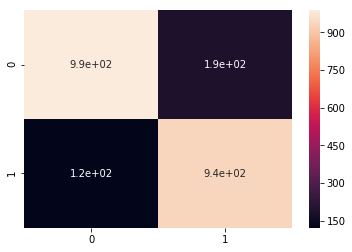

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

0:	learn: 0.8066973	test: 0.8163905	best: 0.8163905 (0)	total: 87.2ms	remaining: 1m 27s
1:	learn: 0.8186807	test: 0.8168383	best: 0.8168383 (1)	total: 174ms	remaining: 1m 26s
2:	learn: 0.8192407	test: 0.8172862	best: 0.8172862 (2)	total: 264ms	remaining: 1m 27s
3:	learn: 0.8131930	test: 0.8101209	best: 0.8172862 (2)	total: 363ms	remaining: 1m 30s
4:	learn: 0.8165528	test: 0.8159427	best: 0.8172862 (2)	total: 450ms	remaining: 1m 29s
5:	learn: 0.8202486	test: 0.8186296	best: 0.8186296 (5)	total: 540ms	remaining: 1m 29s
6:	learn: 0.8189047	test: 0.8186296	best: 0.8186296 (5)	total: 631ms	remaining: 1m 29s
7:	learn: 0.8229365	test: 0.8244514	best: 0.8244514 (7)	total: 725ms	remaining: 1m 29s
8:	learn: 0.8233845	test: 0.8199731	best: 0.8244514 (7)	total: 826ms	remaining: 1m 30s
9:	learn: 0.8251764	test: 0.8226601	best: 0.8244514 (7)	total: 918ms	remaining: 1m 30s
10:	learn: 0.8278643	test: 0.8257949	best: 0.8257949 (10)	total: 1.01s	remaining: 1m 31s
11:	learn: 0.8303281	test: 0.8266906	bes

94:	learn: 0.8572069	test: 0.8490820	best: 0.8504254 (57)	total: 7.84s	remaining: 1m 14s
95:	learn: 0.8582148	test: 0.8495298	best: 0.8504254 (57)	total: 7.92s	remaining: 1m 14s
96:	learn: 0.8582148	test: 0.8495298	best: 0.8504254 (57)	total: 7.96s	remaining: 1m 14s
97:	learn: 0.8582148	test: 0.8495298	best: 0.8504254 (57)	total: 8.01s	remaining: 1m 13s
98:	learn: 0.8593348	test: 0.8495298	best: 0.8504254 (57)	total: 8.11s	remaining: 1m 13s
99:	learn: 0.8591108	test: 0.8499776	best: 0.8504254 (57)	total: 8.21s	remaining: 1m 13s
100:	learn: 0.8596707	test: 0.8495298	best: 0.8504254 (57)	total: 8.33s	remaining: 1m 14s
101:	learn: 0.8597827	test: 0.8495298	best: 0.8504254 (57)	total: 8.39s	remaining: 1m 13s
102:	learn: 0.8604547	test: 0.8495298	best: 0.8504254 (57)	total: 8.47s	remaining: 1m 13s
103:	learn: 0.8610147	test: 0.8495298	best: 0.8504254 (57)	total: 8.55s	remaining: 1m 13s
104:	learn: 0.8610147	test: 0.8495298	best: 0.8504254 (57)	total: 8.6s	remaining: 1m 13s
105:	learn: 0.860

187:	learn: 0.8716542	test: 0.8535602	best: 0.8557994 (177)	total: 16.8s	remaining: 1m 12s
188:	learn: 0.8714302	test: 0.8535602	best: 0.8557994 (177)	total: 16.9s	remaining: 1m 12s
189:	learn: 0.8721021	test: 0.8535602	best: 0.8557994 (177)	total: 17s	remaining: 1m 12s
190:	learn: 0.8719901	test: 0.8544559	best: 0.8557994 (177)	total: 17.1s	remaining: 1m 12s
191:	learn: 0.8715422	test: 0.8540081	best: 0.8557994 (177)	total: 17.1s	remaining: 1m 12s
192:	learn: 0.8714302	test: 0.8531124	best: 0.8557994 (177)	total: 17.2s	remaining: 1m 12s
193:	learn: 0.8713182	test: 0.8531124	best: 0.8557994 (177)	total: 17.3s	remaining: 1m 12s
194:	learn: 0.8719901	test: 0.8540081	best: 0.8557994 (177)	total: 17.4s	remaining: 1m 12s
195:	learn: 0.8718781	test: 0.8540081	best: 0.8557994 (177)	total: 17.5s	remaining: 1m 11s
196:	learn: 0.8719901	test: 0.8540081	best: 0.8557994 (177)	total: 17.6s	remaining: 1m 11s
197:	learn: 0.8718781	test: 0.8540081	best: 0.8557994 (177)	total: 17.7s	remaining: 1m 11s
1

278:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.2s	remaining: 1m 5s
279:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.3s	remaining: 1m 5s
280:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.4s	remaining: 1m 5s
281:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.5s	remaining: 1m 4s
282:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.6s	remaining: 1m 4s
283:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.6s	remaining: 1m 4s
284:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.7s	remaining: 1m 4s
285:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.8s	remaining: 1m 4s
286:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 25.9s	remaining: 1m 4s
287:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26s	remaining: 1m 4s
288:	learn: 0.8799418	test: 0.8580385	best: 0.8580385 (260)	total: 26.1s	remaining: 1m 4s
289:	learn: 

370:	learn: 0.8846455	test: 0.8584863	best: 0.8602777 (335)	total: 33.9s	remaining: 57.5s
371:	learn: 0.8848695	test: 0.8589342	best: 0.8602777 (335)	total: 34s	remaining: 57.4s
372:	learn: 0.8847575	test: 0.8589342	best: 0.8602777 (335)	total: 34.1s	remaining: 57.3s
373:	learn: 0.8847575	test: 0.8589342	best: 0.8602777 (335)	total: 34.2s	remaining: 57.3s
374:	learn: 0.8847575	test: 0.8589342	best: 0.8602777 (335)	total: 34.3s	remaining: 57.2s
375:	learn: 0.8848695	test: 0.8589342	best: 0.8602777 (335)	total: 34.4s	remaining: 57.1s
376:	learn: 0.8853175	test: 0.8589342	best: 0.8602777 (335)	total: 34.5s	remaining: 57s
377:	learn: 0.8853175	test: 0.8589342	best: 0.8602777 (335)	total: 34.6s	remaining: 56.9s
378:	learn: 0.8855415	test: 0.8589342	best: 0.8602777 (335)	total: 34.7s	remaining: 56.8s
379:	learn: 0.8854295	test: 0.8589342	best: 0.8602777 (335)	total: 34.8s	remaining: 56.7s
380:	learn: 0.8855415	test: 0.8589342	best: 0.8602777 (335)	total: 34.8s	remaining: 56.6s
381:	learn: 0.

463:	learn: 0.8897973	test: 0.8571429	best: 0.8602777 (335)	total: 43.3s	remaining: 50.1s
464:	learn: 0.8899093	test: 0.8571429	best: 0.8602777 (335)	total: 43.4s	remaining: 50s
465:	learn: 0.8896853	test: 0.8566950	best: 0.8602777 (335)	total: 43.5s	remaining: 49.9s
466:	learn: 0.8895733	test: 0.8571429	best: 0.8602777 (335)	total: 43.6s	remaining: 49.8s
467:	learn: 0.8896853	test: 0.8571429	best: 0.8602777 (335)	total: 43.7s	remaining: 49.7s
468:	learn: 0.8896853	test: 0.8571429	best: 0.8602777 (335)	total: 43.8s	remaining: 49.6s
469:	learn: 0.8895733	test: 0.8566950	best: 0.8602777 (335)	total: 43.9s	remaining: 49.5s
470:	learn: 0.8895733	test: 0.8566950	best: 0.8602777 (335)	total: 44s	remaining: 49.5s
471:	learn: 0.8895733	test: 0.8566950	best: 0.8602777 (335)	total: 44.2s	remaining: 49.4s
472:	learn: 0.8894613	test: 0.8566950	best: 0.8602777 (335)	total: 44.3s	remaining: 49.3s
473:	learn: 0.8899093	test: 0.8562472	best: 0.8602777 (335)	total: 44.4s	remaining: 49.2s
474:	learn: 0.

555:	learn: 0.8938291	test: 0.8575907	best: 0.8602777 (335)	total: 52.7s	remaining: 42.1s
556:	learn: 0.8940531	test: 0.8580385	best: 0.8602777 (335)	total: 52.8s	remaining: 42s
557:	learn: 0.8940531	test: 0.8580385	best: 0.8602777 (335)	total: 52.9s	remaining: 41.9s
558:	learn: 0.8940531	test: 0.8571429	best: 0.8602777 (335)	total: 53s	remaining: 41.8s
559:	learn: 0.8940531	test: 0.8580385	best: 0.8602777 (335)	total: 53.1s	remaining: 41.7s
560:	learn: 0.8942771	test: 0.8575907	best: 0.8602777 (335)	total: 53.1s	remaining: 41.6s
561:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 53.2s	remaining: 41.5s
562:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 53.3s	remaining: 41.4s
563:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 53.4s	remaining: 41.3s
564:	learn: 0.8941651	test: 0.8571429	best: 0.8602777 (335)	total: 53.5s	remaining: 41.2s
565:	learn: 0.8943891	test: 0.8575907	best: 0.8602777 (335)	total: 53.6s	remaining: 41.1s
566:	learn: 0.

647:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 1m	remaining: 33.1s
648:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 1m	remaining: 33s
649:	learn: 0.8967410	test: 0.8602777	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.9s
650:	learn: 0.8967410	test: 0.8602777	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.8s
651:	learn: 0.8965170	test: 0.8602777	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.7s
652:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.6s
653:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.5s
654:	learn: 0.8965170	test: 0.8607255	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.4s
655:	learn: 0.8965170	test: 0.8598298	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.3s
656:	learn: 0.8965170	test: 0.8593820	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.2s
657:	learn: 0.8969649	test: 0.8593820	best: 0.8607255 (647)	total: 1m 1s	remaining: 32.1s
658:	learn: 0.8969

739:	learn: 0.9006608	test: 0.8584863	best: 0.8607255 (647)	total: 1m 9s	remaining: 24.3s
740:	learn: 0.9006608	test: 0.8584863	best: 0.8607255 (647)	total: 1m 9s	remaining: 24.2s
741:	learn: 0.9005488	test: 0.8589342	best: 0.8607255 (647)	total: 1m 9s	remaining: 24.1s
742:	learn: 0.9003248	test: 0.8593820	best: 0.8607255 (647)	total: 1m 9s	remaining: 24s
743:	learn: 0.9005488	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.9s
744:	learn: 0.9007728	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.8s
745:	learn: 0.9009968	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.7s
746:	learn: 0.9009968	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.6s
747:	learn: 0.9012207	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.5s
748:	learn: 0.9012207	test: 0.8598298	best: 0.8607255 (647)	total: 1m 9s	remaining: 23.4s
749:	learn: 0.9012207	test: 0.8593820	best: 0.8607255 (647)	total: 1m 10s	remaining: 23.4s
750:	learn:

832:	learn: 0.9034606	test: 0.8602777	best: 0.8607255 (647)	total: 1m 17s	remaining: 15.5s
833:	learn: 0.9036846	test: 0.8598298	best: 0.8607255 (647)	total: 1m 17s	remaining: 15.4s
834:	learn: 0.9035726	test: 0.8593820	best: 0.8607255 (647)	total: 1m 17s	remaining: 15.3s
835:	learn: 0.9036846	test: 0.8598298	best: 0.8607255 (647)	total: 1m 17s	remaining: 15.2s
836:	learn: 0.9035726	test: 0.8598298	best: 0.8607255 (647)	total: 1m 17s	remaining: 15.1s
837:	learn: 0.9036846	test: 0.8598298	best: 0.8607255 (647)	total: 1m 17s	remaining: 15s
838:	learn: 0.9037966	test: 0.8593820	best: 0.8607255 (647)	total: 1m 17s	remaining: 15s
839:	learn: 0.9033486	test: 0.8607255	best: 0.8607255 (647)	total: 1m 18s	remaining: 14.9s
840:	learn: 0.9037966	test: 0.8602777	best: 0.8607255 (647)	total: 1m 18s	remaining: 14.8s
841:	learn: 0.9037966	test: 0.8598298	best: 0.8607255 (647)	total: 1m 18s	remaining: 14.7s
842:	learn: 0.9037966	test: 0.8598298	best: 0.8607255 (647)	total: 1m 18s	remaining: 14.6s
843

924:	learn: 0.9059245	test: 0.8593820	best: 0.8611733 (858)	total: 1m 25s	remaining: 6.95s
925:	learn: 0.9058125	test: 0.8593820	best: 0.8611733 (858)	total: 1m 25s	remaining: 6.86s
926:	learn: 0.9060365	test: 0.8589342	best: 0.8611733 (858)	total: 1m 25s	remaining: 6.76s
927:	learn: 0.9060365	test: 0.8593820	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.67s
928:	learn: 0.9060365	test: 0.8598298	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.58s
929:	learn: 0.9062605	test: 0.8593820	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.49s
930:	learn: 0.9062605	test: 0.8593820	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.4s
931:	learn: 0.9062605	test: 0.8593820	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.3s
932:	learn: 0.9062605	test: 0.8598298	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.21s
933:	learn: 0.9063725	test: 0.8598298	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.12s
934:	learn: 0.9062605	test: 0.8598298	best: 0.8611733 (858)	total: 1m 26s	remaining: 6.02s
9

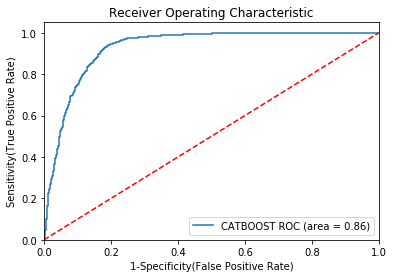

In [52]:
from sklearn import metrics
plt.figure()

# Add the models to the list that you want to view on the ROC plot
models = [
    {
    'label': 'CATBOOST',
    'model': CatBoostClassifier(eval_metric='Accuracy',use_best_model=True,random_seed=42),        
    }
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train,y_train,cat_features=categorical_features_indices,eval_set=(X_test,y_test)) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X=StandardScaler()
X_train2=pd.DataFrame(sc_X.fit_transform(X_train))
X_test2=pd.DataFrame(sc_X.transform(X_test))